# Lab 1: Wavefunctions and Fourier Series #



## Instructions ##

### Exit app mode ###
To get started, you first need to exit "Appmode" in your nanoHUB Jupyter Notebook session. To do that, click the "Edit App" button that shows up at the top right of your screen, as illustrated in the image below.<br>
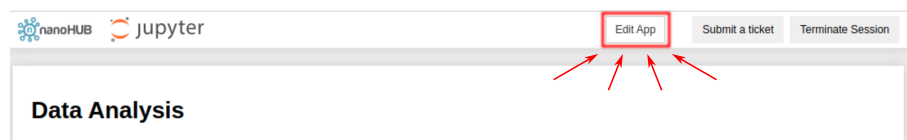
This will allow you view and modify the Python source code that the Jupyter Notebook runs. <br><br>




## Background ##

In this first experiment, you will review some of the Python code you learned in CHM37301. If you did not take take CHM37301 and are new to Python, this will also serve as an introduction to Python programming using the Jupyter Notebook interface on nanoHUB.org.  

The goals of this experiment are as follows:

1. To introduce you to **Python programming using the Jupyter Notebook interface** on nanoHUB.org. 

2. To review **Python commands** to plot, define functions, and run for loops in Python.

3. To **plot the quantum wavefunctions for a particle in a box model**.

4. To **simulate a traveling wave** and see how multiple sine waves can add together in a **Fourier series** to make different waveforms.

You will use the Jupyter notebook on nanoHUB for every lab this semester.  After this lab, you will have to write most of your code from scratch. Make sure you understand the code you use today, because you will be using it in future labs.  If you need extra help, there are many great resources online for learning Jupyter and Python.

## Importing libraries ##

#### 1. Import libraries in the cell below. ####
First you will import the libraries that will be used in the rest of this notebook.  Run `import numpy as np` in order to load the `numpy` library and to be able to call it with `np.XXXX`, where `XXXX` is some command like `np.sin(4)` or `np.pi`.  Next, import the plotting library `matplotlib.pyplot` as `plt`.  Run a cell in Jupyter by clicking in the box and selecting **Run** from the menu or pressing **Shift + Enter**. It should print "Libraries imported" because of the `print("text")` command.

In [ ]:
# This line tells Python to use the NumPy library
# *** write code here to import numpy as np

# All of our plotting commands will now start with `plt`. 
# *** write code here to import matplotlib.pyplot as plt

# We'll also change the default font size to make our plots more readable.
plt.rc('font', size=16) 
print("Libraries imported.")

<br>
<br>

## Plotting a Traveling Wave ##

In classical mechanics, particles are treated as having a single definite position and velocity.  You might say a particle is at $x=4$ and has a velocity of $v=+1$ m$/$s. This is an excellent description of large objects at our every day scale, but this formalism completely fails at very small scales. At the small scale of electrons and atoms, particles actually behave like waves. Waves are all around you. Light is a wave of the electromagnetic field.  Sound is a wave of the collision of molecules.  In this section, you are going to learn about the fundamental properties of waves and make an interactive simulation of a traveling wave. 
<br><br>


A simple position cosine wave looks like  $y = A \cos(\frac{2\pi}{\lambda} x)$. The wavelength $\lambda$ is the distance between two maxima or minima. The amplitude $A$ is distance from the center to the minimum or maximum. 
#### 2. Below plot a simple cosine wave as a function of position from x=0 to x=1 with an amplitude of 1 and wavelength of $\lambda = 1$. 
Plot using the command `plt.plot(x,y)`.  After you plot, also label the x and y axis with `plt.xlabel("x")` and `plt.ylabel("y")`. 

In [ ]:
x = np.linspace(0,1,100) # equaly spaced array of 100 points from 0 to 1.
wl = 1 # wavelength
A = 1 # amplitude
y = A*np.cos(2*np.pi*x/wl)

# *** write code to plot y vs x, and label the axes with "x" and "y"

plt.show()

If the wave is a function of time, then we write it as $y = A \cos(2\pi f t)$, where $f$ is the frequency.  The period $T$ is the distance between two maxima or minima, and is given by $T = 1/f$. 
#### 3. Plot a cosine wave with respect to time  from t=0 to t=4 with an amplitude of $A =0.5$ and a period  $T = 0.5$.

In [ ]:
# *** Type code here.

<br>
A traveling wave is similar to the cosine position wave from the last section, except is also shifts with respect to time.  A traveling wave is represented by the function $y = A \cos[\frac{2 \pi}{\lambda}(x- v t)]$, where $v$ is the speed of the wave.  

In this next section, you will make an interactive plot so you can watch the waveform travel.  
#### 4. Add code for plotting to the interactive code below.
Then run the code and then change the time $t$ and amplitude $A$ slider bars to see how the wave evolves. To make an interactive plot, you first need to import the `interactive()` function from the `ipywidgets` library. 

In [6]:
%matplotlib inline
from ipywidgets import interactive

# Define a function that plots a traveling wave. This function will be used by interactive()
def f(A,t):
    plt.figure(2)
    x = np.linspace(0,4, num=50)
    v = 1 # speed 
    wl = 1 # wavelength
        
    # *** Type code to plot a traveling wave, set the y limits from -1 to 1 with plt.ylim([-1,1]), and label the axes
                
    plt.title('Traveling Wave')
    plt.show()

# Make the interactive plot        
interactive_plot = interactive(f, A=(0, 1.0), t=(0.00,1.00,0.01))
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='A', max=1.0), FloatSlider(value=0.5, description='t'…

Change the time to $t=0.00$.  Notice that at $x=0$, the wave is at a maximum.  Increase the time until the wave is again at a maximum at $x=0$.  
#### 5.The period $T$ is how long it takes to go from one maximum to another.  What is the period of this traveling wave?

If you plot $y$ at a single position as a function of time, you get a sine wave but in time.  For example if $x=0$, then the traveling wave becomes $y = A \cos( 2 \pi \frac{v}{\lambda} t)$.  A wave in time is given by $y = A \cos(2 \pi f t)$, where $f$ is the frequency.  Comparing these two expression, we see that the frequency is related to the velocity and wavelength by $f = \frac{v}{\lambda}$.  
#### 6.  From the velocity and wavelength of the traveling wave in the simulation, calculate the expected period.  Does it agree with your answer to question 5?

## Plotting wavefunctions for particle in a box ##

  In classical mechanics, a particle has a definite position and velocity.  The huge conceptual leap that led to quantum mechanics is that particles actually behave like waves at the microscopic scale.  In the first two weeks of your CHM374 lectures, you will learn how particles in quantum mechanics are represented by quantum wavefunctions.  **The wavefunction is often represented by a complex function $\Psi(x)$.**  Just as in classical waves, the wavefunction is spreadout over many different positions.   **The probability density function is given by the square magnitude of the wavefunction,   PDF=$|\Psi(x)|^2$, and gives the probability that the particle can be found at each position.** <br><br>

One of the simplest quantum systems, and one which you spend a lot of time with in CHM374, is the **1D particle in a box** model (also known as the **infinite square well**). A particle is trapped in a 1D box of width $L$.  We will define the coordinates so that the box is between $x=0$ and $x=L$.  The potential outside the box is infinite $V=\inf$, which means that the particle cannot exit the box.  The potential inside the box is zero $V=0$, so that the particle bounces back and forth within the box as a free particle.
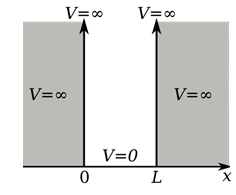

When the particle is trapped in the box, only waves with specific wavelengths are allowed because the probability of the particle must go to zero at the boundary conditions.  Its probability of being outside the box must be zero.  This boundary condition only allows specific wavelengths to exist in the box.  Each wavelength corresponds to a different energy particle, which leads to a discrete set of allowed energies:

$E_n =\frac{n^2 \pi^2 \hbar^2}{2 m L^2}$

Here $n$ is an integer, where $n=1$ is the lowest energy, also called the **ground state energy**.  Each of these energies has a corresponding wavefunction:

$\Psi_n(x) = \sqrt{\frac{2}{L}} \sin(n \frac{ \pi x}{L} )$

In this next section, you will plot the lowest energy wavefunctions for the particle in a box model. As you learn quantum mechanics in CHM374, Python and Jupyter can be  powerful tools for visualizing wavefunctions.

#### 7. Plot the ground state (n=1) wavefunction for particle in a box.  Use L = 1.  Label your axes. 

In [ ]:
# *** Write code here.

Next you will plot the five lowest energy wavefunctions by using a for loop.  Below is an example of how to use a for loop to plot multiple curves in a single figure. A for loop is started with `for n in range(1,10):`.  The command `range(1,10)` gives you a list `[1,2,...,9,10]`. The content of the for loop is then indented, and the for loop stops when the code is not indented anymore. In the example below, it first plots n=1, then n=2, and so forth until n=10.   Run the below code. You will then use it to help plot multiple wavefunctions in the next part.

In [ ]:
x = np.array([0,1,2]) # create a numpy array for the x-axis

for n in range(1,10):
    y = n*x  # the contents of the for loop must be indented 
    plt.plot(x,y)  # every iteration of a loop plots a new line

plt.xlabel('x')
plt.ylabel('y')
plt.title('Using a for loop to plot multiple lines')
plt.show()

#### 8. Use a for loop to plot the 5 lowest energy wavefunctions for a particle in a box, meaning n=1,2,3,4,5.
The wavefunction is given by $\psi = \sqrt{\frac{2}{L}} \sin( n \pi x /L )$.  Add an offset of $4(n-1)$ to each wavefunction so that they all don't overlap.

In [ ]:
#### *** Insert you code here. 

## Calculating with Jupyter and Python
<br>
Jupyter is also a powerful tool for performing calculations.  Many calculations in quantum mechanics involve extremely small numbers, which make calculators cubersome.  In this next example, you will calculate the discrete energies, or **eigen-energies**, for an electron in a particle in the box model. The energies are given by 
$E_n =\frac{n^2 \pi^2 \hbar^2}{2 m L^2}$.  The constant $\hbar$ is called reduced Planck's constant.  We will assume that the width of the box is roughly the size of the hydrogen atom, $L = 3 a_0$, where $a_0 = 5.29\times 10^{-11}$ meters is the Bohr radius. This is a very crude model for a hydrogen atom, but we will see how accurate the energy is compared to the ground state hydrogen energy.  

#### 9. The constants are defined below.  Calculate the ground state energy (n=1) for  $L = 3 a_0$  in both Joules and electron volts.

In [ ]:
# Define constants
h = 6.626e-34 # Planck's constant
hbar = h/(2*np.pi) # Reduced Planck's constant h/(2*pi)
m_electron = 9.11e-31 # mass of an electron in kg
eV = 1.602e-19 # 1 electron volt in Joules
a0 = 5.29e-11 # bohr radius (roughly the radius a ground state hydrogen atom)

# Calculate the energy 
n=1
L = 3*a0 # width of the box, which is roughly diameter of ground state hydrogen atom
E_Joules = # *** Insert code here.   # energy in Joules
print("Energy in Joules: ", E_Joules)

E_eV = E_Joules/eV # convert energy from Joules to electron volts
print("Energy in eV: ", E_eV)

The actual ground state energy of the hydrogen atom is 13.6 eV!  This is pretty good agreement considering that we are ignoring the fact that the hydrogen atom is actually 3-dimensional, not 1-dimensional. In your quantum course, it can be very useful to have a notebook saved with all these constants.  


## Fourier Series: Adding multiple waves ## 
We have looked at the lowest energy waves in the particle in a box model. In your quantum course, you will learn about **wave-particle duality**, which describes how quantum particles sometimes behave like waves and sometime behave like localized particles.  

In this last section, you will see how you can add multiple sinusoidal waves to give other types of waveforms, including something that looks like a localized particle!   The theory of adding multiple sinusoidal waves to get an arbitrary waveform is called **Fourier Series**. 

The code below adds up 5 cosine waves    $y_{total} = \sum_n A_n \cos(\pi n x/\lambda)$.   The amplitude $A_n$ of each wave is given in the array `A_list = np.array([A_1, A_2, A_3, A_4, A_5, A_6])`.  The following code plots only $n=1$, which is also called the **first harmonic**, by setting `A_list = np.array([1,0,0,0,0])`.  You will use this code as an example for the remaining sections.   You can change the amplitudes of each mode by changing `A_list`.  The black curve is the total wave, and the light curves are each indidividual wave.

In [ ]:
x = np.linspace(-1,1,201)
wl = 1 # wavelength of the n=1 wave

# Define amplitudes for each harmonic
A_list = np.array([1,0,0,0,0,0]) # plot only first harmonic

# Plot each waveform and the total waveform in black
y_total = np.zeros(np.size(x))
for n in range(1,np.size(A_list)):
    y = A_list[n-1] * np.cos(np.pi*n/wl*x)
    plt.plot(x,y,'-',alpha=0.3) # plot the individual waves
    y_total = y + y_total
    
plt.plot(x,y_total,"black") # plot the total wave
plt.xlabel('x')
plt.ylabel('y')
plt.title('')
plt.show()   

Now you will look at the case when you include multiple amplitudes.
#### 10. Copy the code above, and change the list to  `A_list = [0.81, 0, .09, 0, .03, 0, 0.02, 0 , 0.1]`.   The black curve is the summed wave and the lighter curves are each individual wave.

In [ ]:
# Type your code here

#### 11. Copy the code above, and change the list to A_list = [0.08, 0.19, 0.39, 0.66, 0.90, 1.00, 0.90, 0.66, 0.39, 0.19, 0.08]. 

In [ ]:
# Type your code here. 

By adding up many waves, the waveform is now localized to the center.  In fact, by adding even more harmonics we can make the wave as small as you want. In our quantum course, you will learn about the wave-particle duality, which means that particles in quantum mechanics have both wave and particle characteristic.   We can see even in this simple wave example that by adding multiple wavefunctions, you can create something that looks like a particle. 

### 9. Discussion and Conclusions

Based on your observations, answer the following questions. Type your answers directly into the text cells following each question. (If instead of a text box you seen a statement like "Type Markdown and LaTeX:  $\alpha^2$", just double click on that text to open the text box.) These are *Markdown* cells, i.e., they accept text input using the Markdown text-formatting language. Markdown allows you to produce nicely-formatted text. For example: 
* Text enclosed in a single pair of asterisks `*like this*` will be formatted in italics. 
* Text enclosed in a double pair of asterisks `**like this**` will be formatted in bold. 
* Text enclosed in dollar signs `$like this$` will be interpreted as a mathematical equation using LaTex syntax. 

When you are finished with your answer, type <Shift+Enter> to convert your input into formatted text. If you want to modify your input, just double-click on it to re-enter text entry mode. 

#### Question 1: Write in your own words the fundamental difference between quantum mechanics and classical mechanics?

#### Question 2: Comment on what the total wave in questions 10 and 11 looks like.   For question 10, what happens if you set some more of the amplitudes to zero?   What do you think would happen if you added more waves?

### 10. Submit! 

Finally, when you're satisfied with your answers, download your notebook as a PDF by selecting File > Print Preview from the dropdown menu at the top right of this window. (See screen shot below.) Then print the new window as a PDF, and save it under the Lab1 assignment on the Brightspace page **for your lab section**. <br>

Note: There are separate Brightspace pages for your lab section and for the Monday lecture. You will submit your PDF notebooks on your lab Brightspace page, **not** the Monday lecture page. 

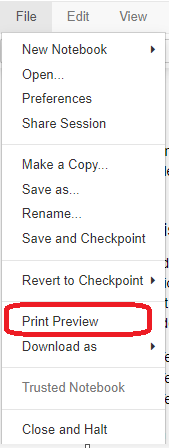